In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
from pso import ParticleSwarmOptimizedClustering
from particle import quantization_error, calc_sse
from utils import normalize
from kmeans import KMeans
import utils
from sklearn.metrics import silhouette_score

In [36]:
data = pd.read_csv('./data/heart_processed.txt', sep=' ', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [37]:
y = np.array(data[13])
x = data.drop([4], axis=1)
x = x.values
x = normalize(x)
x

array([[0.70833333, 1.        , 0.        , ..., 0.        , 0.85714286,
        0.        ],
       [0.79166667, 1.        , 1.        , ..., 1.        , 0.42857143,
        1.        ],
       [0.79166667, 1.        , 1.        , ..., 0.66666667, 1.        ,
        1.        ],
       ...,
       [0.58333333, 1.        , 1.        , ..., 0.33333333, 1.        ,
        1.        ],
       [0.58333333, 0.        , 0.33333333, ..., 0.33333333, 0.42857143,
        1.        ],
       [0.1875    , 1.        , 0.66666667, ..., 0.        , 0.42857143,
        0.        ]])

# K-Means

In [38]:
kmeans = KMeans(n_cluster=2, init_pp=False, seed=2018)
kmeans.fit(x)

In [39]:
predicted_kmeans = kmeans.predict(x)
print('Silhouette:', silhouette_score(x, predicted_kmeans))
print('SSE:', kmeans.SSE)
print('Quantization:', quantization_error(centroids=kmeans.centroid, data=x, labels=predicted_kmeans))
print('Err_ratio:', utils.stupid_precision_ratio(predicted_kmeans, y, 3))

Silhouette: 0.24318239397214486
SSE: 352.25915126981715
Quantization: 1.057770434598518
Err_ratio: (0.9900990099009901, (1, 0, 2))


In [40]:
kmeans2 = KMeans(n_cluster=2, init_pp=True, seed=2018)
kmeans2.fit(x)
predicted_kmeans2 = kmeans2.predict(x)
print('Silhouette:', silhouette_score(x, predicted_kmeans))
print('SSE:', kmeans2.SSE)
print('Quantization:', quantization_error(centroids=kmeans2.centroid, data=x, labels=predicted_kmea
print('Err_ratio:', utils.stupid_precision_ratio(predicted_kmeans2, y, 3))ns2))

SyntaxError: invalid syntax (<ipython-input-40-65f86f0e4b00>, line 7)

# PSO

In [41]:
pso = ParticleSwarmOptimizedClustering(
        n_cluster=2, n_particles=10, data=x,dump_w=0.99,c1=2,c2=2,w=1, hybridFalsee, max_iter=2000, print_debug=50)

In [42]:
hist = pso.run()

Initial global best score 1.057770434598518
Iteration 0001/2000 current gbest score 1.057770434598517939
Iteration 0051/2000 current gbest score 1.057770434598517939


C:\Users\moham\Desktop\2CS\Optim\Projet\Partitioning_Clustering_using_PSO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Iteration 0101/2000 current gbest score 1.057770434598517939
Iteration 0151/2000 current gbest score 1.057770434598517939
Iteration 0201/2000 current gbest score 1.057770434598517939
Iteration 0251/2000 current gbest score 1.057770434598517939
Iteration 0301/2000 current gbest score 1.057770434598517939
Iteration 0351/2000 current gbest score 1.057770434598517939
Iteration 0401/2000 current gbest score 1.057770434598517939
Iteration 0451/2000 current gbest score 1.057770434598517939
Iteration 0501/2000 current gbest score 1.057770434598517939
Iteration 0551/2000 current gbest score 1.057770434598517939
Iteration 0601/2000 current gbest score 1.057770434598517939
Iteration 0651/2000 current gbest score 1.057770434598517939
Iteration 0701/2000 current gbest score 1.057770434598517939
Iteration 0751/2000 current gbest score 1.057770434598517939
Iteration 0801/2000 current gbest score 1.057770434598517939
Iteration 0851/2000 current gbest score 1.057770434598517939
Iteration 0901/2000 curr

In [43]:
pso_kmeans = KMeans(n_cluster=2, init_pp=False, seed=2018)

In [44]:
pso_kmeans.centroid = pso.gbest_centroids.copy()
pso_kmeans.centroid

array([[0.48913043, 0.55279503, 0.59213251, 0.33329427, 0.14285714,
        0.41304348, 0.67199279, 0.1242236 , 0.09557203, 0.20186335,
        0.08902692, 0.53061224, 0.        ],
       [0.57629108, 0.82394366, 0.86384977, 0.38081318, 0.15492958,
        0.58802817, 0.51849264, 0.55633803, 0.24943208, 0.41197183,
        0.37089202, 0.83199195, 0.97887324]])

In [45]:
predicted_pso = pso_kmeans.predict(x)
print('Silhouette:', silhouette_score(x, predicted_pso))
print('SSE:', calc_sse(centroids=pso.gbest_centroids, data=x, labels=predicted_pso))
print('Quantization:', quantization_error(pso.gbest_centroids, predicted_pso, x))
print('Err_ratio:', utils.stupid_precision_ratio(predicted_pso, y, 3))

Silhouette: 0.24318239397214486
SSE: 352.25915126981715
Quantization: 1.057770434598518
Err_ratio: (0.9900990099009901, (0, 1, 2))


In [31]:
from sklearn.decomposition import PCA
pca = PCA(x.shape[1])
X_iris_r = pca.fit(x).transform(x)

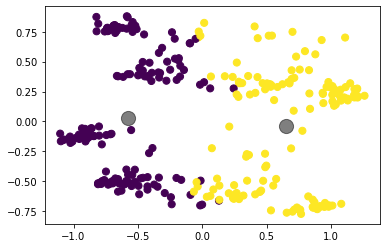

In [32]:
plt.scatter(X_iris_r[:, 0], X_iris_r[:, 1], c=predicted_pso, s=50, cmap='viridis')

centers = pca.transform(pso.gbest_centroids)    

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

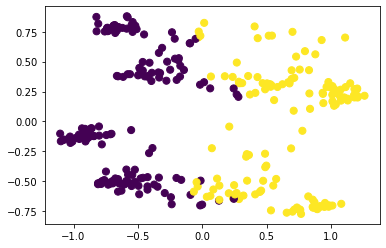

In [33]:
plt.scatter(X_iris_r[:, 0], X_iris_r[:, 1], c=y, s=50, cmap='viridis')

# Repeated Test

### K-Means++

In [21]:
kmeanspp = {
    'silhouette': [],
    'sse' : [],
    'quantization' : [],
}
for _ in range(20):
    kmean_rep = KMeans(n_cluster=2, init_pp=True)
    kmean_rep.fit(x)
    predicted_kmean_rep = kmean_rep.predict(x)
    #print(predicted_kmean_rep)
    silhouette = silhouette_score(x, predicted_kmean_rep)
    sse = kmean_rep.SSE
    quantization = quantization_error(centroids=kmean_rep.centroid, data=x, labels=predicted_kmean_rep)
    kmeanspp['silhouette'].append(silhouette)
    kmeanspp['sse'].append(sse)
    kmeanspp['quantization'].append(quantization)

### PSO 

In [22]:
%%time
pso_plain = {
    'silhouette': [],
    'sse' : [],
    'quantization' : [],
}
for _ in range(20):
    pso_rep = ParticleSwarmOptimizedClustering(
        n_cluster=2, n_particles=10, data=x,dump_w=0.99,c1=2,c2=2,w=1, hybrid=False, max_iter=2000, print_debug=2000)
    pso_rep.run()
    pso_kmeans = KMeans(n_cluster=2, init_pp=False, seed=2018)
    pso_kmeans.centroid = pso_rep.gbest_centroids.copy()
    predicted_pso_rep = pso_kmeans.predict(x)
    
    silhouette = silhouette_score(x, predicted_pso_rep)
    sse = calc_sse(centroids=pso_rep.gbest_centroids, data=x, labels=predicted_pso_rep)
    quantization = pso_rep.gbest_score
    pso_plain['silhouette'].append(silhouette)
    pso_plain['sse'].append(sse)
    pso_plain['quantization'].append(quantization)

Initial global best score 1.282938464349118
Iteration 0001/2000 current gbest score 1.158293117580312170


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 1.024463416277286765
Initial global best score 1.246677277835623
Iteration 0001/2000 current gbest score 1.156871655412359701


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 1.057335058371712044
Initial global best score 1.2424063015333595
Iteration 0001/2000 current gbest score 1.180450443304050356


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 1.027474124829834468
Initial global best score 1.1865984272847632
Iteration 0001/2000 current gbest score 1.152450567187963237


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.860287734629944456
Initial global best score 1.1788952954318552
Iteration 0001/2000 current gbest score 1.084769468004409321


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 1.030595292552783260
Initial global best score 1.213227676286935
Iteration 0001/2000 current gbest score 1.171296765510873694


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.961972912935669333
Initial global best score 1.227411434848642
Iteration 0001/2000 current gbest score 1.169876595921905738


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.998335632458496769
Initial global best score 1.2533790372351061
Iteration 0001/2000 current gbest score 1.140851156066868155


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 1.027363968998327604
Initial global best score 1.216048883978365
Iteration 0001/2000 current gbest score 1.041631294790285489


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.968903472512982811
Initial global best score 1.1973671238819712
Iteration 0001/2000 current gbest score 1.138023147623575593


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 1.053175266711278590
Initial global best score 1.2338106276124527
Iteration 0001/2000 current gbest score 1.107524349299166433


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 1.064881198521694383
Initial global best score 1.2278875003565677
Iteration 0001/2000 current gbest score 1.179644998202939332


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 1.033909505706066767
Initial global best score 1.2511020051188044
Iteration 0001/2000 current gbest score 1.108382645617730589


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 1.024339078318795559
Initial global best score 1.2002968456225616
Iteration 0001/2000 current gbest score 1.133284427717456744


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.911879562519266162
Initial global best score 1.2369270792273714
Iteration 0001/2000 current gbest score 1.115489304973644513


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 1.018972907667382799
Initial global best score 1.216675503938729
Iteration 0001/2000 current gbest score 1.170179502821980133


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 1.058987779696453746
Initial global best score 1.3314068826504133
Iteration 0001/2000 current gbest score 1.151510803127003602


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 1.062631374895289582
Initial global best score 1.2390012874912997
Iteration 0001/2000 current gbest score 1.192955045222470201


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 1.045226603103827756
Initial global best score 1.272941285858539
Iteration 0001/2000 current gbest score 1.123353783705678399


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 1.009977410675027221
Initial global best score 1.2186982933202226
Iteration 0001/2000 current gbest score 1.218698293320222614


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 1.007190706267411473
Wall time: 4min 10s


### PSO Hybrid

In [23]:
%%time
pso_hybrid = {
    'silhouette': [],
    'sse' : [],
    'quantization' : [],
}
for _ in range(20):
    pso_rep = ParticleSwarmOptimizedClustering(
        n_cluster=2, n_particles=10, data=x,dump_w=0.99,c1=2,c2=2,w=1, hybrid=True, max_iter=2000, print_debug=2000)
    pso_rep.run()
    pso_kmeans = KMeans(n_cluster=2, init_pp=False, seed=2018)
    pso_kmeans.centroid = pso_rep.gbest_centroids.copy()
    predicted_pso_rep = pso_kmeans.predict(x)
    
    silhouette = silhouette_score(x, predicted_pso_rep)
    sse = calc_sse(centroids=pso_rep.gbest_centroids, data=x, labels=predicted_pso_rep)
    quantization = pso_rep.gbest_score
    pso_hybrid['silhouette'].append(silhouette)
    pso_hybrid['sse'].append(sse)
    pso_hybrid['quantization'].append(quantization)

Initial global best score 1.0008511461371405
Iteration 0001/2000 current gbest score 1.000851146137140546


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 1.000067721314768621
Initial global best score 1.0008511461371405
Iteration 0001/2000 current gbest score 1.000851146137140546


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.999368979747785602
Initial global best score 1.0008511461371405
Iteration 0001/2000 current gbest score 1.000851146137140546


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.999862277411858402
Initial global best score 1.0008511461371405
Iteration 0001/2000 current gbest score 1.000851146137140546


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.999689229604529994
Initial global best score 1.0008511461371405
Iteration 0001/2000 current gbest score 1.000851146137140546


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 1.000215987812562046
Initial global best score 1.0008511461371405
Iteration 0001/2000 current gbest score 1.000798706465407140


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.999431801428375621
Initial global best score 1.0008511461371405
Iteration 0001/2000 current gbest score 1.000851146137140546


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.999823811657501227
Initial global best score 1.0008511461371405
Iteration 0001/2000 current gbest score 1.000851146137140546


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.999786094081292820
Initial global best score 1.0008511461371405
Iteration 0001/2000 current gbest score 1.000836512679727619


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 1.000031343672947770
Initial global best score 1.0144138871665043
Iteration 0001/2000 current gbest score 1.013946302431893987


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 1.012724567955471056
Initial global best score 1.0048541984610915
Iteration 0001/2000 current gbest score 1.004854198461091475


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 1.002195007468529075
Initial global best score 1.0008511461371405
Iteration 0001/2000 current gbest score 1.000851146137140546


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.999739156057872558
Initial global best score 1.0144138871665043
Iteration 0001/2000 current gbest score 1.014413887166504269


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 1.012466876933562743
Initial global best score 1.0008511461371405
Iteration 0001/2000 current gbest score 1.000851146137140546


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.999142690658171739
Initial global best score 1.0144138871665043
Iteration 0001/2000 current gbest score 1.014413887166504269


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 1.012221410291561430
Initial global best score 1.0008511461371405
Iteration 0001/2000 current gbest score 1.000851146137140546


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 1.000329721356580048
Initial global best score 1.0008511461371405
Iteration 0001/2000 current gbest score 1.000851146137140546


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 1.000314460552914397
Initial global best score 1.0008511461371405
Iteration 0001/2000 current gbest score 1.000851146137140546


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.999920168774673934
Initial global best score 1.0048541984610915
Iteration 0001/2000 current gbest score 1.004854198461091475


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 1.003640363530258650
Initial global best score 1.0008511461371405
Iteration 0001/2000 current gbest score 1.000851146137140546


d:\study\2SIQ3\OPTIM\Partitioning_Clustering_using_ACO_metaheuristic\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.999358656318809380
Wall time: 1min 45s


# Comparison

In [24]:
benchmark = {
    'method' : ['K-Means++', 'PSO', 'PSO Hybrid'],
    'sse_mean' : [
        np.around(np.mean(kmeanspp['sse']), decimals=10),
        np.around(np.mean(pso_plain['sse']), decimals=10),
        np.around(np.mean(pso_hybrid['sse']), decimals=10),
    ],
    'sse_stdev' : [
        np.around(np.std(kmeanspp['sse']), decimals=10),
        np.around(np.std(pso_plain['sse']), decimals=10),
        np.around(np.std(pso_hybrid['sse']), decimals=10),
    ],
    'silhouette_mean' : [
        np.around(np.mean(kmeanspp['silhouette']), decimals=10),
        np.around(np.mean(pso_plain['silhouette']), decimals=10),
        np.around(np.mean(pso_hybrid['silhouette']), decimals=10),
    ],
    'silhouette_stdev' : [
        np.around(np.std(kmeanspp['silhouette']), decimals=10),
        np.around(np.std(pso_plain['silhouette']), decimals=10),
        np.around(np.std(pso_hybrid['silhouette']), decimals=10),
    ],
    'quantization_mean' : [
        np.around(np.mean(kmeanspp['quantization']), decimals=10),
        np.around(np.mean(pso_plain['quantization']), decimals=10),
        np.around(np.mean(pso_hybrid['quantization']), decimals=10),
    ],
    'quantization_stdev' : [
        np.around(np.std(kmeanspp['quantization']), decimals=10),
        np.around(np.std(pso_plain['quantization']), decimals=10),
        np.around(np.std(pso_hybrid['quantization']), decimals=10),
    ],
}

In [25]:
benchmark

{'method': ['K-Means++', 'PSO', 'PSO Hybrid'],
 'sse_mean': [328.6670608596, 391.6973940503, 323.396516429],
 'sse_stdev': [13.8896666801, 36.1625748871, 3.0138386068],
 'silhouette_mean': [0.2009297849, 0.1343657739, 0.20871241],
 'silhouette_stdev': [0.0124132872, 0.0516522078, 0.0094420556],
 'quantization_mean': [1.0194684532, 1.0123951504, 1.0020165163],
 'quantization_stdev': [0.0297859789, 0.0508387423, 0.004504653]}

In [26]:
benchmark_df = pd.DataFrame.from_dict(benchmark)
benchmark_df

,method,sse_mean,sse_stdev,silhouette_mean,silhouette_stdev,quantization_mean,quantization_stdev
0,K-Means++,328.667061,13.889667,0.200930,0.012413,1.019468,0.029786
1,PSO,391.697394,36.162575,0.134366,0.051652,1.012395,0.050839
2,PSO Hybrid,323.396516,3.013839,0.208712,0.009442,1.002017,0.004505


In [27]:
benchmark_df.to_excel('benchmark_heart_res.xlsx', index=False)

In [28]:
benchmark_df.to_csv('benchmark_heart_res.csv', index=False)